<a href="https://colab.research.google.com/github/peddlem25/citrusview/blob/master/citrusfruit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install google_images_download

     |████████████████████████████████| 911kB 7.3MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=b173c1e5c0fb5544aa6448727621cac96660d7e43d28439f7752f8e041fa8411
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [20]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

arguments = {"keywords": "lemon,lime,grapefruit,blood orange", "limit":100,"print_urls":True}
paths = response.download(arguments)
print(paths)


Item no.: 1 --> Item name = lemon
Evaluating...
Starting Download...
Image URL: https://i5.walmartimages.com/asr/d1d2733f-19ca-4daa-b6aa-50541387f02b_1.9049cc9de37c4294570e394b28c2f5ab.jpeg?odnHeight=450&odnWidth=450&odnBg=FFFFFF
Completed Image ====> 1.d1d2733f-19ca-4daa-b6aa-50541387f02b_1.9049cc9de37c4294570e394b28c2f5ab.jpeg
Image URL: https://i0.wp.com/images-prod.healthline.com/hlcmsresource/images/AN_images/lemon-health-benefits-1296x728-feature.jpg?w=1155&h=1528
Completed Image ====> 2.lemon-health-benefits-1296x728-feature.jpg
Image URL: https://cdn.shopify.com/s/files/1/2336/3219/products/shutterstock_336818993meyer_x850.jpg?v=1554665742
Completed Image ====> 3.shutterstock_336818993meyer_x850.jpg
Image URL: https://www.thesun.co.uk/wp-content/uploads/2019/09/NINTCHDBPICT000513722593-e1567805131254.jpg
Completed Image ====> 4.NINTCHDBPICT000513722593-e1567805131254.jpg
Image URL: https://cdn.shopify.com/s/files/1/2336/3219/products/shutterstock_77846398eureka2_x850.jpg?v=155

In [7]:
#delete below if it does not work
!git clone https://github.com/llSourcell/image_classifier_template.git

Cloning into 'image_classifier_template'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 124 (delta 13), reused 0 (delta 0), pack-reused 99
Receiving objects: 100% (124/124), 113.20 KiB | 1.80 MiB/s, done.
Resolving deltas: 100% (18/18), done.


In [8]:
!git clone https://github.com/naveenchanakya/bear-classifier.git

Cloning into 'bear-classifier'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 14 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [9]:
#importing the drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#importing the required packages
from fastai.vision import *
from fastai.metrics import error_rate

In [11]:
cd drive/My\ Drive


/content/drive/My Drive


In [0]:
#creating directory
path = Path('/content/drive/My Drive/downloads')
dest = path/'/content/drive/My Drive/downloads/blood orange'
dest.mkdir(parents = True, exist_ok = True)

dest = path/'/content/drive/My Drive/downloads/grapefruit'
dest.mkdir(parents=True, exist_ok=True)

dest = path/'/content/drive/My Drive/downloads/lemon'
dest.mkdir(parents=True, exist_ok=True)

dest = path/'/content/drive/My Drive/downloads/lime'
dest.mkdir(parents=True, exist_ok=True)

In [0]:
#deleting corrupted images
classes = ['blood orange','grapefruit','lemon', 'lime']

for c in classes:
  print(c)
  verify_images(path/c, delete = True, max_size = 500)

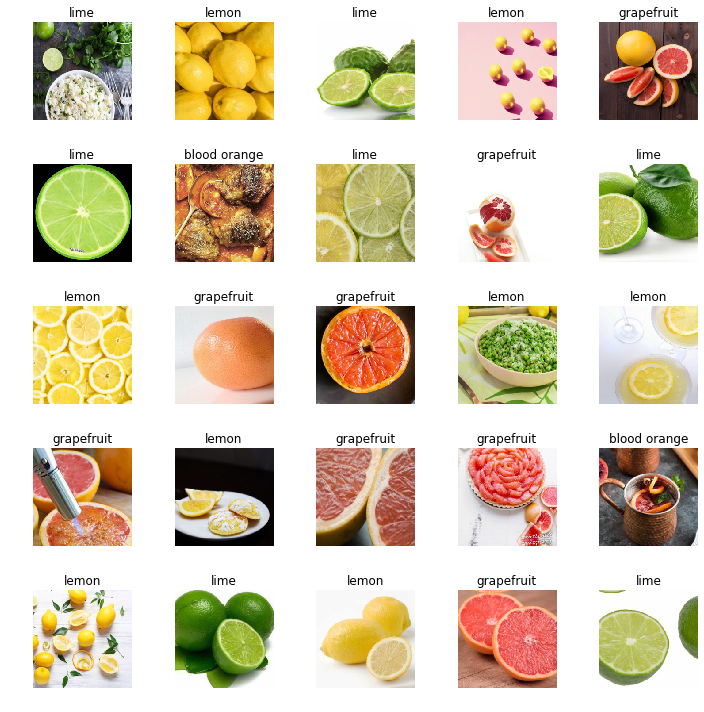

In [28]:
#view data
data = ImageDataBunch.from_folder(path, train='.', valid_pct = 0.2, seed=66,
                                  ds_tfms = get_transforms(), size = 224).normalize(imagenet_stats)
data.show_batch(rows = 5, figsize = (10,10))

In [29]:
print(data.classes)
print(len(data.train_ds))
print(len(data.valid_ds))

['blood orange', 'grapefruit', 'lemon', 'lime']
296
74


In [30]:
#Training
learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 32735823.44it/s]


In [31]:
learn.fit_one_cycle(12)

epoch,train_loss,valid_loss,error_rate,time
0,1.741178,1.713846,0.756757,01:50
1,1.502370,1.062891,0.418919,01:51
2,1.201015,0.737022,0.256757,01:47
3,0.997013,0.705235,0.229730,01:51
4,0.831040,0.703443,0.216216,01:46
5,0.712357,0.709630,0.216216,01:47
6,0.620621,0.743074,0.202703,01:47
7,0.543798,0.760348,0.202703,01:46
8,0.485847,0.760621,0.202703,01:45
9,0.441403,0.751973,0.202703,01:49


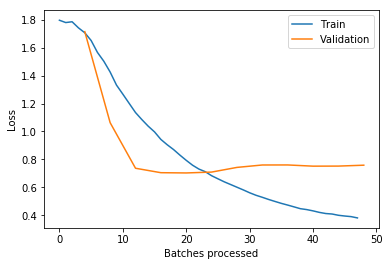

In [32]:
learn.recorder.plot_losses()


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


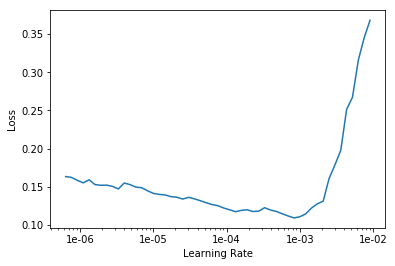

In [35]:
learn.lr_find()
learn.recorder.plot()

In [36]:
learn.fit_one_cycle(3,max_lr=slice(3e-5,3e-4))


epoch,train_loss,valid_loss,error_rate,time
0,0.167003,0.736981,0.202703,02:23
1,0.128127,0.756990,0.216216,02:24
2,0.113885,0.749997,0.216216,02:24


In [0]:
learn.save('stage-2')


#Interpretation


In [0]:
learn.load('stage-1');


In [0]:
interp = ClassificationInterpretation.from_learner(learn)


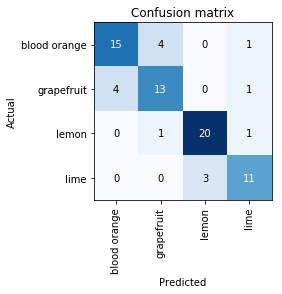

In [40]:
interp.plot_confusion_matrix()


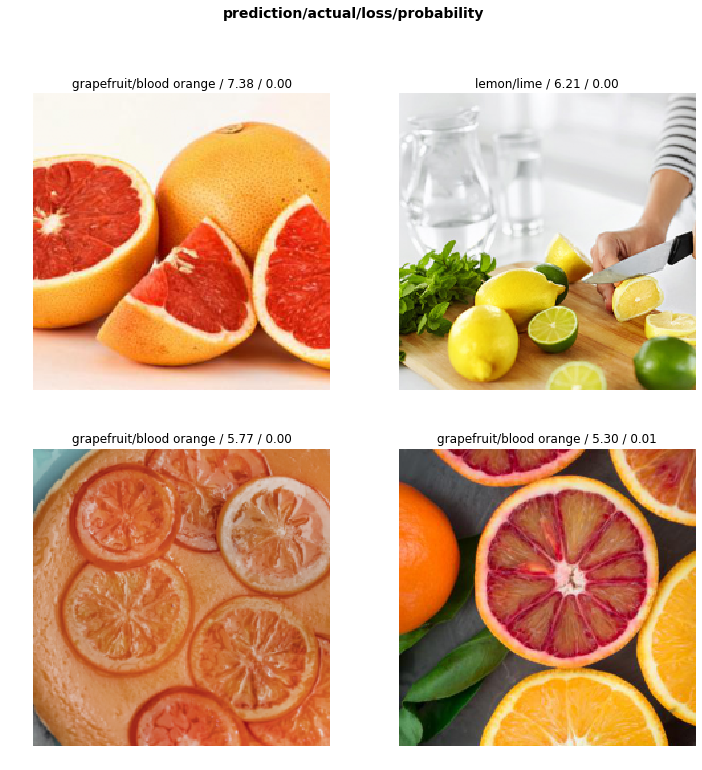

In [41]:
interp.plot_top_losses(k = 4, heatmap=False)


#Prediction

In [0]:
defaults.device = torch.device('cpu')

In [0]:
learn.export()


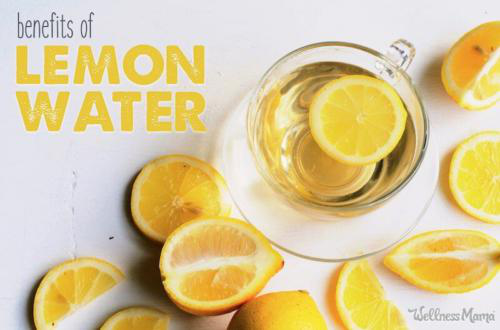

In [45]:
#example image
img = open_image(path/'/content/drive/My Drive/downloads/lemon/15.benefits-lemon-water-1.jpg')
img

In [0]:
learn = load_learner(path)


In [47]:
pred,idx,outputs = learn.predict(img)
print('Predicted class: ',pred)

Predicted class:  lemon


#Pickle Time
export your trained model as a pkl file


In [0]:
import pickle

In [0]:
with open('learn_pickle', 'wb') as f:
  pickle.dump(learn,f)